# Perceptron0

## Neural Networks

Neural Networks are a machine learning framework that attempts to mimic the learning pattern of natural biological neural networks: you can think of them as a crude approximation of what we assume the human mind is doing when it is learning. Biological neural networks have interconnected neurons with dendrites that receive inputs, then based on these inputs they produce an output signal through an axon to another neuron. We will try to mimic this process through the use of Artificial Neural Networks (ANN), which we will just refer to as neural networks from now on. Neural networks are the foundation of deep learning, a subset of machine learning that is responsible for some of the most exciting technological advances today! The process of creating a neural network in Python begins with the most basic form, a single perceptron. Let’s start by explaining the single perceptron!

## The Perceptron

Let’s start our discussion by talking about the Perceptron! A perceptron has one or more inputs, a bias, an activation function, and a single output. The perceptron receives inputs, multiplies them by some weight, and then passes them into an activation function to produce an output. There are many possible activation functions to choose from, such as the logistic function, a trigonometric function, a step function etc. We must also make sure to add a bias to the perceptron, a constant weight outside of the inputs that allows us to achieve better fit for our predictive models. Check out the diagram below for a visualization of a perceptron:

![Perceptron](Perceptron-small.png)

Perceptron formula: $Out = AF(\sum (x * w) + Bias)$, where vector $x = (x1,x2,...,xn)$ and vector $w = (w1,w2,...,wn)$
    
    

A perceptron is a building block that can be used to do simple binary classifications: only 2 classes. The preceptron 
is used in 2 modi: train or inference. In train mode the perceptron is given input data as well as the desired outcome.
It will first predict the outcome $Out$ abd then compare its prediction with the desired outcome. It will then 
correct the weights $w$ a bit. Then the next input is presented to the perceptron together with its desired outcome
and again the perceptron will adapt the weights. After all inputs are done then the perceptron will still not be 
able to do a fault free prediction. It will take up to 100 epochs (cycles) before the perceptron will predict the 
outcome $Out$ in an acceptable way. 

We start with setting up the necessary libraries. Subsequently we will:
1. set up the input data together with its category labels
2. plot the input data set and colour the set according to its label (0$\rightarrow$red or 1$\rightarrow$blue)
3. train the perceptron after tidying the structure of the data
4. plot the separation line between the 2 classes.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
#import sklearn.linear_model.perceptron as p
from sklearn.linear_model import perceptron
 
# Needed to show the plots inline
%matplotlib inline

from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
%matplotlib inline

Get the data:

In [4]:
# Data
d = np.array([
[2, 1, 2, 5, 7, 2, 4, 6, 1, 2, 5, 4, 6, 5, 2],
[2, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 7, 6]
])
 
# Labels
t = np.array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

Plot points

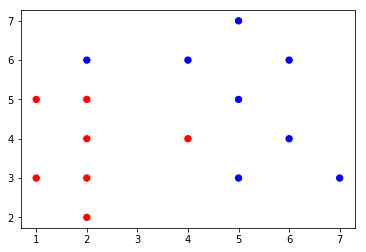

In [5]:
colormap = np.array(['r', 'b'])
plt.scatter(d[0], d[1], c=colormap[t], s=40)

In [6]:
# rotate the data 270 degrees
d90 = np.rot90(d)
d180 = np.rot90(d90)
d270 = np.rot90(d180)

print(d270)
 
mlp = MLPClassifier(hidden_layer_sizes=(2,), verbose=True, activation='tanh', 
                    learning_rate_init = 0.08, random_state=1)
#training the model
mlp.fit(d270, t)

print('Absolute training score:', mlp.score(d270, t))
print('predictions:', mlp.predict(d270)) 


[[2 2]
 [3 1]
 [3 2]
 [3 5]
 [3 7]
 [4 2]
 [4 4]
 [4 6]
 [5 1]
 [5 2]
 [5 5]
 [6 4]
 [6 6]
 [7 5]
 [6 2]]
Iteration 1, loss = 0.69735722
Iteration 2, loss = 0.67249817
Iteration 3, loss = 0.66025725
Iteration 4, loss = 0.65368535
Iteration 5, loss = 0.64394472
Iteration 6, loss = 0.62627142
Iteration 7, loss = 0.60676972
Iteration 8, loss = 0.59362572
Iteration 9, loss = 0.57770510
Iteration 10, loss = 0.56706335
Iteration 11, loss = 0.56438788
Iteration 12, loss = 0.56120938
Iteration 13, loss = 0.55445462
Iteration 14, loss = 0.54496085
Iteration 15, loss = 0.53322621
Iteration 16, loss = 0.51865244
Iteration 17, loss = 0.50368759
Iteration 18, loss = 0.48946551
Iteration 19, loss = 0.47700461
Iteration 20, loss = 0.46537206
Iteration 21, loss = 0.45180605
Iteration 22, loss = 0.43781741
Iteration 23, loss = 0.42147831
Iteration 24, loss = 0.40559773
Iteration 25, loss = 0.38990827
Iteration 26, loss = 0.37604260
Iteration 27, loss = 0.36429346
Iteration 28, loss = 0.35276586
Iterati

C:\Users\Julia\Miniconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


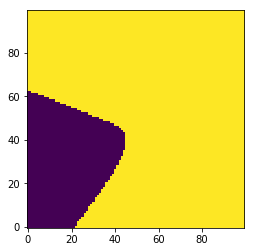

In [7]:
PITCH = 0.1
#RESOLUTION = int(1/PITCH)
x = np.arange(0, 10, PITCH)
y = np.arange(0, 10, PITCH)
crds = np.meshgrid(x, y, sparse=False, indexing='ij')
flatX = np.ravel(crds[0])
flatY = np.ravel(crds[1])
test = np.column_stack((flatX,flatY))
plt.imshow(mlp.predict(test).reshape((100,100)), origin = 'lower')